In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load data and replace -1 labels by 0
data = np.loadtxt('data.dat')
x = data[:, 0:-1]
y = data[:, -1].reshape(x.shape[0], 1)
y[y == -1] = 0

def my_model(x_train, y_train, opt = 'SGD', act = 'relu', num_epochs = 3500):
    if(act == 'relu'):
        num_epochs = 2500
    # callback to stop the training when converged
#     callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8) # 8 for Adam if not sigmoid
    # weight and bias initializers
    weights = tf.keras.initializers.GlorotUniform(seed=99)
    biases = tf.keras.initializers.Zeros()
    # create the model
    model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(2,)),
      tf.keras.layers.Dense(5, bias_initializer=biases, kernel_initializer=weights, activation=act),
      tf.keras.layers.Dense(1, bias_initializer=biases, kernel_initializer=weights, activation='sigmoid')
    ])
    # instantiate the optimizer
    if(opt == 'SGD'):
        optmz = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
    elif(opt == 'Adam'):
        optmz = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
    elif(opt == 'RMSprop'):
        optmz = tf.keras.optimizers.RMSprop(learning_rate=0.001, epsilon=1e-06)
    # learn the parameters
    model.compile(optimizer=optmz, loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=num_epochs, verbose=0)
    # predict on the given point
    prediction = model.predict(tf.constant(np.array([0.8, 0.2]).reshape(1,2)))
    
    return history, 1*(prediction>0.5)

In [2]:
print("The order by which I'm reporting the results is as follows:")
optimizers = ['SGD', 'RMSprop', 'Adam']
activations = ['relu', 'tanh', 'sigmoid']
k = 0
a = np.zeros((1000,9))
for i in range(3):
    print()
    optimizer = optimizers[i]
    for j in range(3):
        activation = activations[j]
        print('opt: ' + optimizer + ' act: ' + activation)
        k+=1

The order by which I'm reporting the results is as follows:

opt: SGD act: relu
opt: SGD act: tanh
opt: SGD act: sigmoid

opt: RMSprop act: relu
opt: RMSprop act: tanh
opt: RMSprop act: sigmoid

opt: Adam act: relu
opt: Adam act: tanh
opt: Adam act: sigmoid


In [3]:
import time
k = 0
loss_histories = []
predictions = []
training_times = []
accuracy = []
for i in range(3):
    optimizer = optimizers[i]
    for j in range(3):
        activation = activations[j]
        t0 = time.time()
        hist, pred = my_model(x, y, opt=optimizer, act=activation)
        t1 = time.time()
        loss_histories.append(hist.history['loss'])
        accuracy.append(hist.history['accuracy'][-1])
        predictions.append(pred)
        training_times.append(t1-t0)

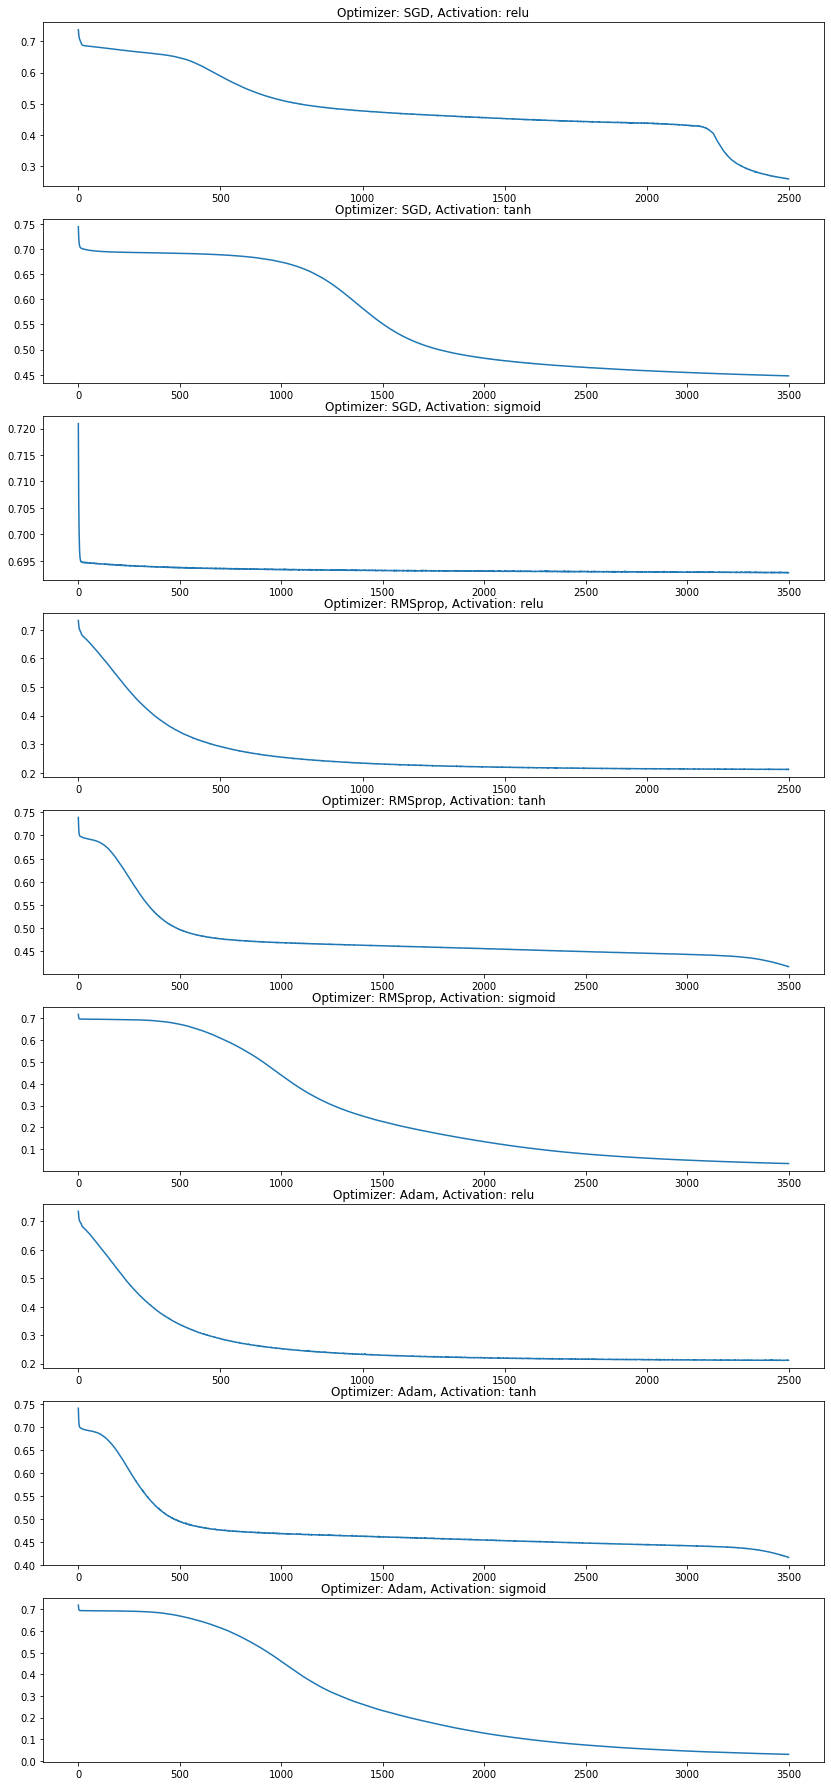

In [5]:
fig, axs = plt.subplots(nrows=9, ncols=1)
fig.set_figheight(32)
fig.set_figwidth(14)
axs = axs.ravel()
a = 0
for i in range(3):
    s1 = 'Optimizer: '+ optimizers[i] + ', Activation: relu'
    s2 = 'Optimizer: '+ optimizers[i] + ', Activation: tanh'
    s3 = 'Optimizer: '+ optimizers[i] + ', Activation: sigmoid'
    
    # visualize
    axs[a].plot(loss_histories[a])
    axs[a].set_title(s1)
    a += 1
    
    # visualize 
    axs[a].plot(loss_histories[a])
    axs[a].set_title(s2)
    a += 1
    
    # visualize 
    axs[a].plot(loss_histories[a])
    axs[a].set_title(s3)
    a += 1

In [19]:
predictions = np.array(predictions).reshape(9,)
print('Opt: SGD' +', Act: relu')
print('Required epochs= 2500' + '\tTraining accuracy= %.3f' %accuracy[0] +'   Prediction for [0.8, 0.2]: '+str(predictions[0]))
print()
print('Opt: SGD' +', Act: tanh')
print('Required epochs= 3000' + '\tTraining accuracy= %.3f' %accuracy[1] +'   Prediction for [0.8, 0.2]: '+str(predictions[1]))
print()
print('Opt: SGD' +', Act: sigmoid')
print('Required epochs= 1300' + '\tTraining accuracy= %.3f' %accuracy[2] +'   Prediction for [0.8, 0.2]: '+str(predictions[2]))
print()
print('Opt: RMSprop' +', Act: relu')
print('Required epochs= 1600' + '\tTraining accuracy= %.3f' %accuracy[3] +'   Prediction for [0.8, 0.2]: '+str(predictions[3]))
print()
print('Opt: RMSprop' +', Act: tanh')
print('Required epochs= 3500' + '\tTraining accuracy= %.3f' %accuracy[4] +'   Prediction for [0.8, 0.2]: '+str(predictions[4]))
print()
print('Opt: RMSprop' +', Act: sigmoid')
print('Required epochs= 3500' + '\tTraining accuracy= %.3f' %accuracy[5] +'   Prediction for [0.8, 0.2]: '+str(predictions[5]))
print()
print('Opt: Adam' +', Act: relu')
print('Required epochs= 1600' + '\tTraining accuracy= %.3f' %accuracy[6] +'   Prediction for [0.8, 0.2]: '+str(predictions[6]))
print()
print('Opt: Adam' +', Act: tanh')
print('Required epochs= 3500' + '\tTraining accuracy= %.3f' %accuracy[7] +'   Prediction for [0.8, 0.2]: '+str(predictions[7]))
print()
print('Opt: Adam' +', Act: sigmoid')
print('Required epochs= 3500' + '\tTraining accuracy= %.3f' %accuracy[8] +'   Prediction for [0.8, 0.2]: '+str(predictions[8]))

Opt: SGD, Act: relu
Required epochs= 2500	Training accuracy= 0.884   Prediction for [0.8, 0.2]: 1

Opt: SGD, Act: tanh
Required epochs= 3000	Training accuracy= 0.778   Prediction for [0.8, 0.2]: 1

Opt: SGD, Act: sigmoid
Required epochs= 1300	Training accuracy= 0.598   Prediction for [0.8, 0.2]: 0

Opt: RMSprop, Act: relu
Required epochs= 1600	Training accuracy= 0.893   Prediction for [0.8, 0.2]: 1

Opt: RMSprop, Act: tanh
Required epochs= 3500	Training accuracy= 0.778   Prediction for [0.8, 0.2]: 1

Opt: RMSprop, Act: sigmoid
Required epochs= 3500	Training accuracy= 0.996   Prediction for [0.8, 0.2]: 1

Opt: Adam, Act: relu
Required epochs= 1600	Training accuracy= 0.893   Prediction for [0.8, 0.2]: 1

Opt: Adam, Act: tanh
Required epochs= 3500	Training accuracy= 0.778   Prediction for [0.8, 0.2]: 1

Opt: Adam, Act: sigmoid
Required epochs= 3500	Training accuracy= 0.998   Prediction for [0.8, 0.2]: 1
